In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

plt.rcParams["figure.figsize"] = (10, 10)

root = '/home/jimge/public/CAP5610/hw1/'

train = pd.read_csv(root + 'train.csv')
test = pd.read_csv(root + 'test.csv')
combined = pd.concat([train, test])
cat_features = ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
num_features = ["Age", "SibSp", "Parch", "Fare"]

In [3]:
'''
Q1 In the training set, which features are available?
'''

print(', '.join([f for f in train.columns if f != 'Survived']))

PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [3]:
'''
Q5: which features contain blank, null, or empty values?
'''
print('*** training missing values')
print(train.isna().sum()[lambda x: x != 0])
print('\n*** test missing values')
print(test.isna().sum()[lambda x: x != 0])

print(test[test.Fare.isna()])

*** training missing values
Age         177
Cabin       687
Embarked      2
dtype: int64

*** test missing values
Age       86
Fare       1
Cabin    327
dtype: int64
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [10]:
'''
Q7: List the summary statistics of numerical features
'''
train[num_features].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [11]:
'''
Q8 Compute the most frequent categorical values
'''
count = train[cat_features].count()
nunique = train[cat_features].nunique()
top_freq = pd.Series(dict([(feat, train[feat].value_counts().values[0]) for feat in cat_features]))

def top_values(feat):
    vc = train[feat].value_counts()
    count = vc.values[0]
    values = ''
    if count > 1:
        values = ', '.join([str(x) for x in vc[vc == count].keys()])
    
    return values
    
top_val = pd.Series(dict([(feat, top_values(feat)) for feat in cat_features]))
    
print(pd.DataFrame({'count': count, 'nunique': nunique, 'top_val': top_val, 'top_freq': top_freq}))


          count  nunique                   top_val  top_freq
Pclass      891        3                         3       491
Name        891      891                                   1
Sex         891        2                      male       577
Ticket      891      681    CA. 2343, 1601, 347082         7
Cabin       204      147  B96 B98, G6, C23 C25 C27         4
Embarked    889        3                         S       644


In [12]:
'''
Q9 Did more than 50% of passengers with Pclass == 1 survive?
'''
pclass = train[train.Pclass == 1]
surv_by_pclass = pclass['Survived'].value_counts()
SURVIVED = 1
print('%3.1f%% survived' % (100 * (surv_by_pclass[SURVIVED] / pclass.shape[0])))


63.0% survived


In [13]:
'''
Q10 did more women survive?
'''
female = train[train.Sex == 'female']
surv_by_female = female['Survived'].value_counts()
print('%3.1f%% survived' % (100 * (surv_by_female[SURVIVED] / female.shape[0])))


74.2% survived


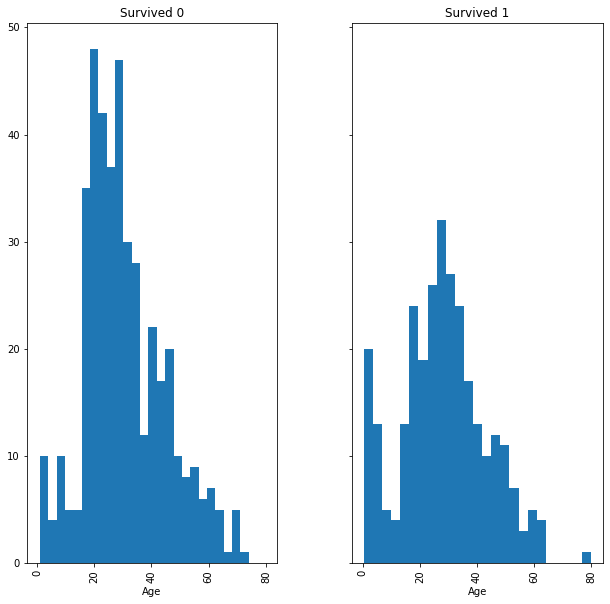

In [14]:
'''
Q11 Plot age by survived
'''
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
train.hist(column='Age', by=['Survived'], bins=25, ax=axes)

axes[0].title.set_text('Survived 0')
axes[0].set_xlabel('Age')
axes[1].title.set_text('Survived 1')
axes[1].set_xlabel('Age')

plt.savefig(root + 'q11.png')



Class 3 infants not survived 12
Class 3 infants survived 13


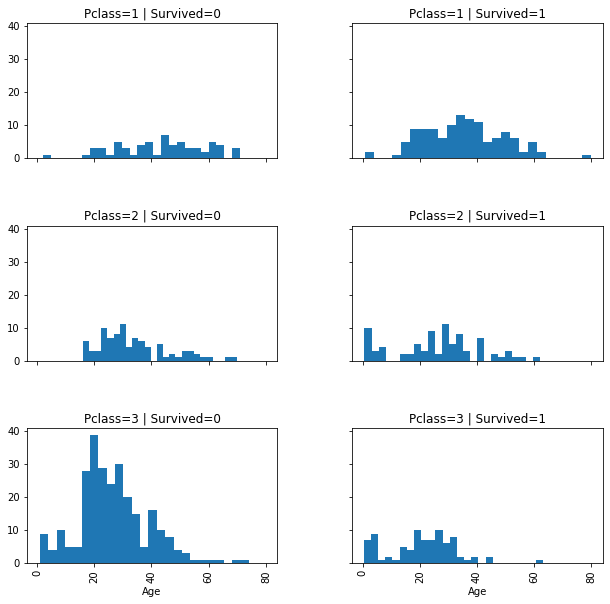

In [30]:
'''
Q12 Plot age by pclass and survived
'''
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)

train.hist(column='Age', by=['Pclass', 'Survived'], ax=axes, bins=25)

for cl in range(0, 3):
    for su in range(0, 2):
        axes[cl][su].title.set_text('Pclass=%d | Survived=%d' % (cl+1, su))
axes[2][0].set_xlabel("Age")
axes[2][1].set_xlabel("Age")

plt.savefig(root + 'q12.png')

print('Class 3 infants not survived',train.loc[(train.Pclass==3) & (train.Age <= 4) & (train.Survived == 0)].Survived.count())
print('Class 3 infants survived',train.loc[(train.Pclass==3) & (train.Age <= 4) & (train.Survived == 1)].Survived.count())

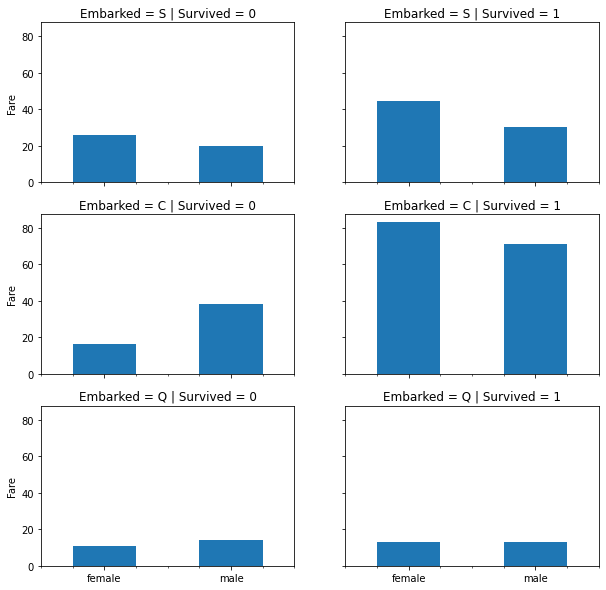

In [31]:
'''
Q13 Plot mean fare by Embarked and gender
'''
embs = ['S', 'C', 'Q']
gens = ['female', 'male']

embarks = [train[train.Embarked == e] for e in embs]

surv = [x[x.Survived == 0] for x in embarks] + [x[x.Survived == 1] for x in embarks]

def makedf(df):
    return pd.DataFrame([[gen, df[df.Sex == gen].Fare.mean()] for gen in gens])

surv = [makedf(x) for x in surv]

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)

for y in range(0, 3):
    for x in range(0, 2):
        axis = axes[y, x]
        surv[y + 3 * x].plot.bar(ax = axis, legend = False)
        axis.set_title('Embarked = %s | Survived = %d' % (embs[y], x))
        axis.set_xticks(range(0, 2))
        axis.set_xticklabels(gens, rotation=0)
        axis.set_ylabel('Fare')

plt.savefig(root + 'q13.png')



In [12]:
'''
Q14 What is the rate of duplication of the Ticket feature? Is there correlation between it and survival?
'''
vc = train.Ticket.value_counts()
print(vc.count())
dvc = vc[vc > 1]
print(dvc.count())
dupp = dvc.count() / vc.count()
print('%3.1f%% duplication' % (100*dupp))


681
134
19.7% duplication


In [33]:
'''
Q15 Is the Cabin feature complete?
'''
cabmiss = combined['Cabin'].isna().sum()
print('%d missing values in cabin (%3.1f%%)' % (cabmiss, 100 * (cabmiss / combined.shape[0] )))


1014 missing values in cabin (77.5%)


In [34]:
'''
Q16 recode Sex as Gender where 0 is male and 1 is female
'''
train['Gender'] = (train['Sex'] == 'female').transform(lambda x: 1 if x else 0)

train[['PassengerId', 'Sex', 'Gender']].head()


,PassengerId,Sex,Gender
0,1,male,0
1,2,female,1
2,3,female,1
3,4,female,1
4,5,male,0


In [35]:
'''
Q17 Predict missing Age values
'''
age_mean = train.Age.mean()
age_std = train.Age.std()
def age_rand():
    return np.random.normal(age_mean, age_std)

age_missing = train.Age.isna()
print('*** First 5 missing age values')
print(train[age_missing][['PassengerId', 'Age']].head())

print('\nAge mean is %4.2f, stddev is %4.2f' % (age_mean, age_std))

train.Age = train.Age.transform(lambda x: age_rand() if pd.isna(x) else x)

print('\n*** After filling in with Gaussian')
print(train[age_missing][['PassengerId', 'Age']].head())


*** First 5 missing age values
    PassengerId  Age
5             6  NaN
17           18  NaN
19           20  NaN
26           27  NaN
28           29  NaN

Age mean is 29.70, stddev is 14.53

*** After filling in with Gaussian
    PassengerId        Age
5             6  33.079648
17           18  24.092855
19           20  15.669622
26           27  26.365241
28           29  27.475069


In [37]:
'''
Q18 Replace embarkation with most common value
'''
most_common_emb = train['Embarked'].value_counts().index[0]
embmissing = pd.isna(train.Embarked)
print('Rows with missing Embarked')
print(embmissing[embmissing])
train['Embarked'] = train['Embarked'].transform(lambda x: most_common_emb if pd.isna(x) else x)
print('\nAfter filling:')
print(train.Embarked[embmissing])


Rows with missing Embarked
61     True
829    True
Name: Embarked, dtype: bool

After filling:
61     S
829    S
Name: Embarked, dtype: object


In [13]:
'''
Q19 Replace fare missing value in test with mode of fare
'''
faremissing = pd.isna(test.Fare)
print('Rows with missing Fare')
print(faremissing[faremissing])
fare_mode = test['Fare'].mode().values[0]
test['Fare'] = test['Fare'].transform(lambda x: fare_mode if pd.isna(x) else x)
print('\nAfter filling:')
print(test.Fare[faremissing])

Rows with missing Fare
152    True
Name: Fare, dtype: bool

After filling:
152    7.75
Name: Fare, dtype: float64


In [14]:
'''
Q20 Turn fare into an ordinal based on bands
'''
# NB we can get away with not testing the very bottom and top as the bands cover
# all samples
def fare_ord(x):
    if x <= 7.91:
        return 0
    elif x <= 14.454:
        return 1
    elif x <= 31.0:
        return 2
    else:
        return 3
    
train['FareBand'] = train['Fare'].transform(fare_ord)
train[['Fare', 'FareBand']].head(10)

,Fare,FareBand
0,7.2500,0
1,71.2833,3
2,7.9250,1
3,53.1000,3
4,8.0500,1
5,8.4583,1
6,51.8625,3
7,21.0750,2
8,11.1333,1
9,30.0708,2
